In [3]:
# Import regular libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

# 1) Some preprocessing and data exploration

In [4]:
data = pd.read_csv('student-mat.csv')

In [5]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [6]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:
# all features
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
# merging weekends and weekdays consumption
data['Walc'] = data['Walc'] + data['Dalc']

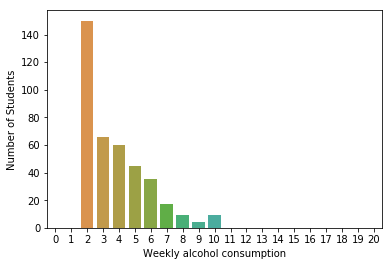

In [9]:
# There is no student who does not consume alcohol. However, all students at least 2 times in a week consume alcohol.
list = []
for i in range(21):
    list.append(len(data[data.Walc == i]))
ax = sns.barplot(x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], y = list)
plt.ylabel('Number of Students')
plt.xlabel('Weekly alcohol consumption')
plt.show()

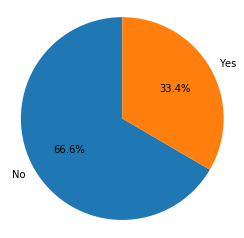

In [10]:
# romantic satus
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(data['romantic'].value_counts().tolist(), 
        labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')
plt.show()

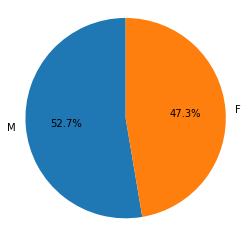

In [11]:
# gender balance
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(data['sex'].value_counts().tolist(), 
        labels=['M', 'F'], autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')
plt.show()

In [12]:
# alcohol consumption
female = data.loc[data['sex'] == 'F']
male = data.loc[data['sex'] == 'M']

In [13]:
male.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,16.657754,2.839572,2.561497,1.491979,1.764706,0.368984,4.000000,3.486631,3.197861,1.732620,4.395722,3.764706,5.144385,11.229947,11.074866,10.914439
std,1.356181,1.100311,1.087670,0.750405,0.808713,0.788152,0.898027,1.001924,1.135164,1.079205,2.289195,1.343337,5.980749,3.392839,3.868088,4.495297
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,2.000000,3.000000,0.000000,9.000000,9.000000,9.000000
50%,16.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,4.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.500000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,6.000000,5.000000,8.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,10.000000,5.000000,38.000000,19.000000,19.000000,20.000000


In [14]:
female.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,16.730769,2.668269,2.485577,1.408654,2.278846,0.302885,3.894231,3.009615,3.028846,1.254808,3.211538,3.365385,6.216346,10.620192,10.389423,9.966346
std,1.201696,1.085946,1.090044,0.645551,0.791949,0.701683,0.894625,0.942760,1.089757,0.595860,1.455777,1.407761,9.445819,3.232530,3.641851,4.622338
min,15.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,4.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,2.000000,0.000000,3.750000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,8.000000,8.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,3.000000,3.000000,4.000000,10.000000,10.000000,10.000000
75%,18.000000,4.000000,3.000000,2.000000,3.000000,0.000000,4.000000,4.000000,4.000000,1.000000,4.000000,5.000000,8.000000,13.000000,13.000000,13.000000
max,20.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,10.000000,5.000000,75.000000,19.000000,18.000000,19.000000


# 2) Clustering

In [15]:
# G_avg = average student grade
data['G_avg'] = (data['G1'] + data['G2'] + data['G3']) / 3

In [16]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G_avg
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,2,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,2,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,5,3,10,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,2,5,2,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,3,5,4,6,10,10,8.666667


In [17]:
X = data[['Walc','G_avg']]

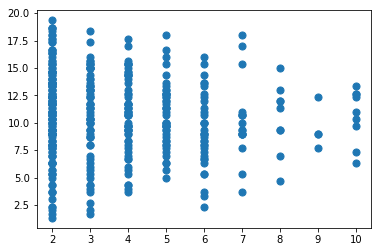

In [18]:
from sklearn.datasets.samples_generator import make_blobs
plt.scatter(X['Walc'], X['G_avg'], s=50);
plt.show()

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

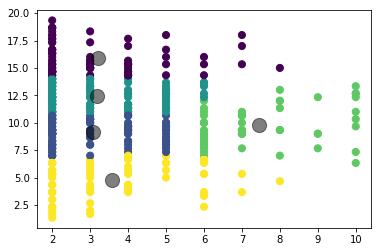

In [20]:
plt.scatter(X['Walc'], X['G_avg'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

K means clustering gave poor results. The connection between average grade and alcohol consumption is not linear. But it is clear, that students, who drink a lot, don't get very high or very low grades.

# 3) Trying to predict grade using regression models

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import cross_val_score

In [22]:
y1 = data['G_avg']
X1 = data.drop(['G1', 'G2', 'G3', 'G_avg'], axis=1)

In [23]:
X1 = pd.get_dummies(X1)

In [24]:
names = ['DecisionTreeRegressor', 'LinearRegression', 'Ridge', 'Lasso']

clf_list = [DecisionTreeRegressor(),
            LinearRegression(),
            Ridge(),
            Lasso()]

In [25]:
for name, clf in zip(names, clf_list):
    print(name, end=': ')
    print(cross_val_score(clf, X1, y1, cv=5).mean())

DecisionTreeRegressor: -0.782540536101
LinearRegression: -1.9392611033e+19
Ridge: 0.0435563035156
Lasso: -0.0274735174589


Bad result for regression models:(

# 4) Vizualize data using classification trees

In [53]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import subprocess
import os
import matplotlib.image as mpimg

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
        img = mpimg.imread('dt.png')
        plt.figure(figsize=(20,20))
        plt.imshow(img, aspect='auto')
        plt.show()
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [54]:
y = pd.cut(data["G_avg"],bins=4,labels=False)
dt = DecisionTreeClassifier(max_leaf_nodes=10, random_state=99)
dt.fit(X1, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

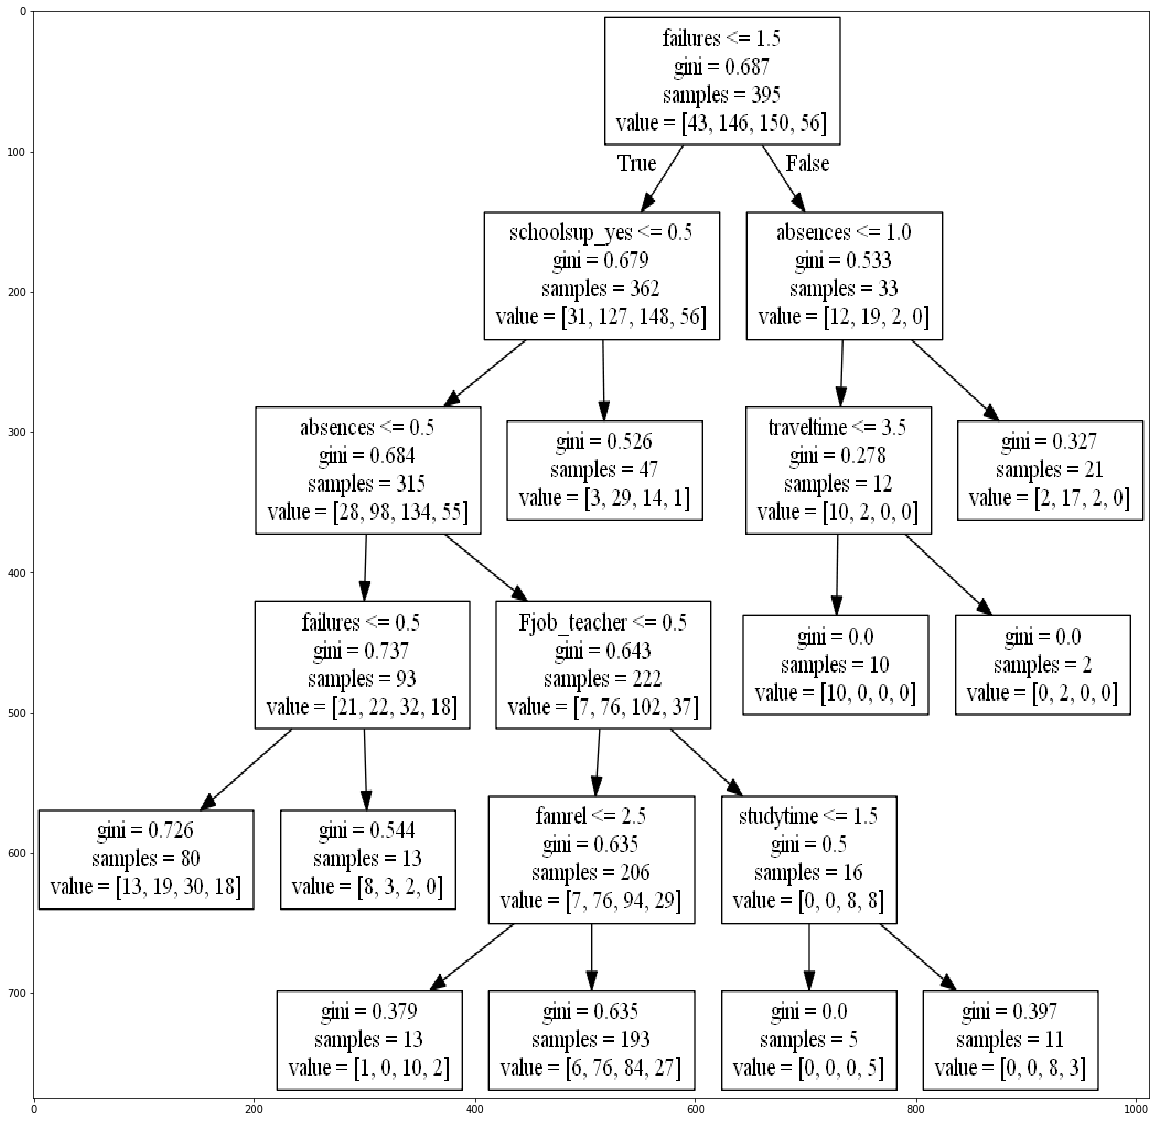

In [55]:
visualize_tree(dt, X1.columns.values.tolist())


As we can see from the tree, the main affection is given by failures rate, absence and scholsup. 

# 5) Regression using neural networks

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
msk = np.random.rand(len(X1)) < 0.8
train_X = X1[msk]
train_Y = y1[msk]
test_X = X1[~msk]
test_Y = y1[~msk]
mlp.fit(train_X, train_Y)
